# 22-eda-stores
> Exploratory data analysis - stores

This is EDA based around the stores table and how it relates to the rest of the Bridgestone dataset.

In [ ]:
# load modules
import seaborn as sns

In [ ]:
store.shape

(2813, 4)

In [ ]:
store.head()

,store_id,state_code,zip_code,msa
0,244240,NE,68134,NaN
1,244233,MO,64151,NaN
2,227602,KY,40272,NaN
3,227603,KY,40219,NaN
4,232365,IN,46142,NaN


In [ ]:
pd.value_counts(store.dtypes)

object    4
dtype: int64

## Store Stats

- 2,813 stores
- no missing store_id, state_code, or zip_code
- 504 missing msa ("metropolitan statistical area" - a city and its surrounding communities)
- state with most stores: Florida (330)
- msa with most stores: Chicago (76)

In [ ]:
store.describe(exclude="number")

,store_id,state_code,zip_code,msa
count,2813,2813,2813,2309
unique,2813,48,2374,321
top,244240,FL,37027,"CHICAGO,IL"
freq,1,330,5,76


In [ ]:
# check for duplicates
print(store.duplicated().sum())

0


In [ ]:
# check for missing values
store.isna().sum()

store_id        0
state_code      0
zip_code        0
msa           504
dtype: int64

In [ ]:
# check stores with missing msa
store[store['msa'].isna()]

,store_id,state_code,zip_code,msa
0,244240,NE,68134,NaN
1,244233,MO,64151,NaN
2,227602,KY,40272,NaN
3,227603,KY,40219,NaN
4,232365,IN,46142,NaN
...,...,...,...,...
2802,244213,MN,56001,NaN
2809,246650,CO,80002,NaN
2810,400645,NV,89410,NaN
2811,794382,SC,29455,NaN


## Sales at Stores

In [ ]:
mega_table.shape

(4000504, 33)

In [ ]:
mega_table.head()

,unnamed_0_x,store_id,tran_id,date,article_id,indiv_id,vehicle_id,units,sales,prod_group_code,...,msa,unnamed_0_y,email_optin_ind,ah1_res_bus_indc,supp1_bus_pander,unnamed_0,make,model,sub_model,model_year
0,1,337934,990994590,2018-07-23,7001647,318422234.0,944814728,0.0,-8.55,4.0,...,HAGERSTOWN,11239886,Y,R,N,NaN,NaN,NaN,NaN,NaN
1,2,337934,990994590,2018-07-23,7001715,318422234.0,944814728,0.0,-50.45,4.0,...,HAGERSTOWN,11239886,Y,R,N,NaN,NaN,NaN,NaN,NaN
2,3,337934,990994590,2018-07-23,7096547,318422234.0,944814728,0.0,10.00,4.0,...,HAGERSTOWN,11239886,Y,R,N,NaN,NaN,NaN,NaN,NaN
3,4,337934,990994590,2018-07-23,7001647,318422234.0,944814728,0.0,0.00,4.0,...,HAGERSTOWN,11239886,Y,R,N,NaN,NaN,NaN,NaN,NaN
4,5,337934,990994590,2018-07-23,7001715,318422234.0,944814728,0.0,0.00,4.0,...,HAGERSTOWN,11239886,Y,R,N,NaN,NaN,NaN,NaN,NaN


In [ ]:
mega_table.columns

Index(['unnamed_0_x', 'store_id', 'tran_id', 'date', 'article_id', 'indiv_id',
       'vehicle_id', 'units', 'sales', 'prod_group_code', 'prod_group_desc',
       'category_code', 'category_desc', 'segment_code', 'segment_desc',
       'class_code', 'class_desc', 'discount_flag', 'cross_section',
       'aspect_ratio', 'rim_size', 'state_code', 'zip_code', 'msa',
       'unnamed_0_y', 'email_optin_ind', 'ah1_res_bus_indc',
       'supp1_bus_pander', 'unnamed_0', 'make', 'model', 'sub_model',
       'model_year'],
      dtype='object')

### Sales Aggregates

#### By store

In [ ]:
by_store = mega_table.groupby(['state_code','store_id']).agg(
    transactions_count = pd.NamedAgg(column='tran_id', aggfunc='nunique')
    ,products_sold_count = pd.NamedAgg(column='article_id', aggfunc='count')
    ,unique_customers = pd.NamedAgg(column='indiv_id', aggfunc='count')
    ,revenue_total = pd.NamedAgg(column='sales', aggfunc='sum')
)

by_store

transactions_count  products_sold_count  \
state_code store_id                                            
AL         12335                    295                 3357   
           16616                    157                 1515   
           17558                    185                 2085   
           18910                    204                 2321   
           18929                    207                 2358   
...                                 ...                  ...   
WV         5878                     225                 2237   
           6009                     177                 1629   
           8540                     246                 2135   
WY         23493                    112                 1045   
           655686                    51                  505   

                     unique_customers  revenue_total  
state_code store_id                                   
AL         12335                 3357       48597.65  
           16616                 1515       34045.43  
           17558                 2085       27849.01  
           18910                 2321       29958.35  
           18929                 2358       34329.94  
...                               ...            ...  
WV         5878                  2237       43096.39  
           6009                  1629       28524.15  
           8540                  2135       42805.85  
WY         23493                 1045       19776.81  
           655686                 505       14059.23  

[2297 rows x 4 columns]

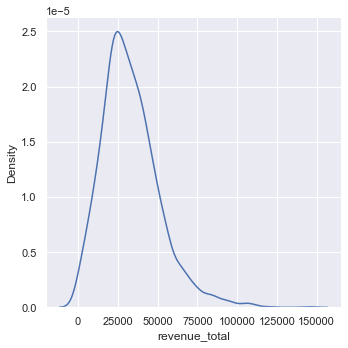

In [ ]:
sns.displot(by_store, x="revenue_total", kind="kde")

#### By state

In [ ]:
by_state = mega_table.groupby(['state_code']).agg(
    transactions_count = pd.NamedAgg(column='tran_id', aggfunc='nunique')
    ,products_sold_count = pd.NamedAgg(column='article_id', aggfunc='count')
    ,unique_customers = pd.NamedAgg(column='indiv_id', aggfunc='count')
    ,revenue_total = pd.NamedAgg(column='sales', aggfunc='sum')
).sort_values(by='revenue_total', ascending=False)

by_state

,transactions_count,products_sold_count,unique_customers,revenue_total
state_code,,,,
FL,47034,520423,520423,9783276.12
TX,42068,395612,395612,8160277.11
CA,29870,299838,299838,6404329.13
GA,19474,198456,198456,3671831.12
PA,14613,164652,164652,2815090.61
IL,14055,150039,150039,2542861.60
NC,14708,148144,148144,2542835.89
OK,14029,110131,110131,2504459.57
OH,13065,135564,135564,2337783.48


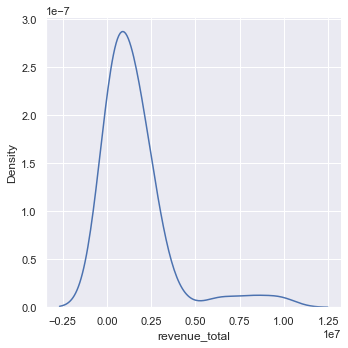

In [ ]:
sns.displot(by_state, x="revenue_total", kind="kde")

#### By msa

In [ ]:
by_msa = mega_table.groupby(['msa']).agg(
    transactions_count = pd.NamedAgg(column='tran_id', aggfunc='nunique')
    ,products_sold_count = pd.NamedAgg(column='article_id', aggfunc='count')
    ,unique_customers = pd.NamedAgg(column='indiv_id', aggfunc='count')
    ,revenue_total = pd.NamedAgg(column='sales', aggfunc='sum')
).sort_values(by='revenue_total', ascending=False)

by_msa

,transactions_count,products_sold_count,unique_customers,revenue_total
msa,,,,
"DALLAS,TX",12813,113432,113432,2412360.90
"ATLANTA,GA",11820,115576,115576,2174687.10
"CHICAGO,IL",10263,109800,109800,1867173.69
"HOUSTON,TX",8940,78814,78814,1608201.04
LOS ANGELE,5929,52680,52680,1134037.39
...,...,...,...,...
STEUBENVIL,56,670,670,9810.81
"WATERLOO,I",56,586,586,7638.96
"SHEBOYGAN,",51,461,461,7089.69


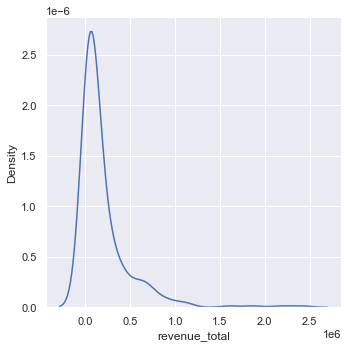

In [ ]:
sns.displot(by_msa, x="revenue_total", kind="kde")

## Mapping

Zip -> Lat/Lon: https://pypi.org/project/pgeocode/
<br>
Plot: https://stackoverflow.com/questions/53233228/plot-latitude-longitude-from-csv-in-python-3-6